## SVM for Facial Detection
~by SHIVAM SHUKLA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
X , y = make_blobs(n_samples=50,centers=2,cluster_std=0.6, random_state=0)

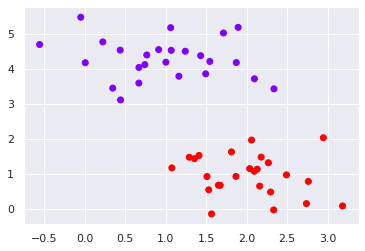

In [5]:
plt.figsize()
plt.scatter(X[:,0],X[:,1],c=y, cmap='rainbow')

In [40]:
xfit = np.linspace(-1,3.5)

In [41]:
xfit

array([-1.        , -0.90816327, -0.81632653, -0.7244898 , -0.63265306,
       -0.54081633, -0.44897959, -0.35714286, -0.26530612, -0.17346939,
       -0.08163265,  0.01020408,  0.10204082,  0.19387755,  0.28571429,
        0.37755102,  0.46938776,  0.56122449,  0.65306122,  0.74489796,
        0.83673469,  0.92857143,  1.02040816,  1.1122449 ,  1.20408163,
        1.29591837,  1.3877551 ,  1.47959184,  1.57142857,  1.66326531,
        1.75510204,  1.84693878,  1.93877551,  2.03061224,  2.12244898,
        2.21428571,  2.30612245,  2.39795918,  2.48979592,  2.58163265,
        2.67346939,  2.76530612,  2.85714286,  2.94897959,  3.04081633,
        3.13265306,  3.2244898 ,  3.31632653,  3.40816327,  3.5       ])

(-1, 3.5)

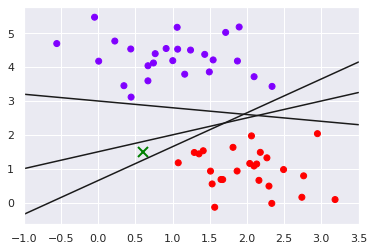

In [42]:
plt.scatter(X[:,0],X[:,1],cmap='rainbow',c=y)

# Plotting test example
plt.plot([0.6],[1.5],color='green',marker='x',markeredgewidth=2,markersize=10,)


# Plotting different fit lines as decision boundary
for slope, intercept in [(1.0,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit, slope*xfit + intercept, '-k')
    
plt.xlim(-1,3.5)

## Plotting Margins

(-1, 3.5)

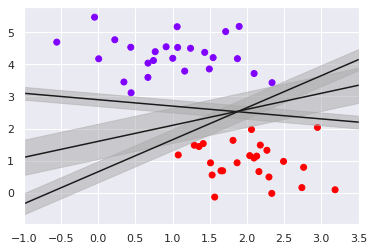

In [49]:
xfit= np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')

for slope, intercept, width in [(1,.65,.33),(.5,1.6,.55),(-.2,2.9,0.2)]:
    yfit= slope*xfit + intercept
    plt.plot(xfit,yfit, '-k')
    plt.fill_between(xfit,yfit-width,yfit+width,edgecolor='none',color='#AAAAAA',alpha=0.5)
    
plt.xlim(-1,3.5)

# Using SVM Classifier with Linear Kernel.

In [50]:
from sklearn.svm import SVC

In [71]:
model = SVC(kernel='linear',C= 100000)

In [72]:
model.fit(X,y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [73]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [74]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

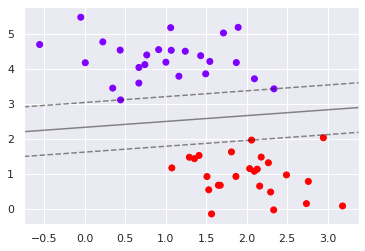

In [75]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')
plot_svc_decision_function(model)

# FACE DETECTION USING SVM

In [76]:
from sklearn.datasets import fetch_lfw_people

In [170]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


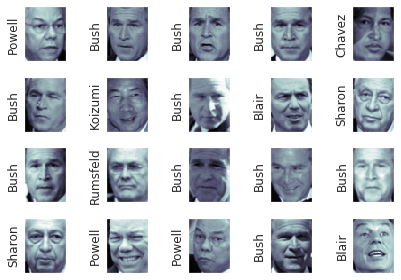

In [171]:
fig,axes = plt.subplots(4,5)
for i,ax in enumerate(axes.flat):
    ax.imshow(faces.images[i],cmap='bone')
    ax.set(xticks=[],yticks=[])
    ax.set(ylabel=faces.target_names[faces.target[i]].split()[-1])

    
# plt.subplots_adjust(left=0.125, bottom=.1, right=.9, top=.9, wspace=.2, hspace=.2) 
plt.tight_layout()

As image has around 62x47 features so we can apply PCA to obtain around 150 features to use for classification.

## Applying PCA and creating Pipeline

In [172]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150,whiten=True)
svc = SVC(kernel='rbf',class_weight='balanced')
model = make_pipeline(pca,svc)

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(faces.data,faces.target,random_state=42)

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
param_grid = {'svc__C': [0.1,1, 10, 100], 'svc__gamma': [0.1,0.01,0.001,.0001]}

In [177]:
grid = GridSearchCV(model,param_grid,verbose=2)
%time grid.fit(Xtrain,Ytrain)


/home/shivam/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] svc__C=0.1, svc__gamma=0.1 ......................................
[CV] ....................... svc__C=0.1, svc__gamma=0.1, total=   0.6s
[CV] svc__C=0.1, svc__gamma=0.1 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ....................... svc__C=0.1, svc__gamma=0.1, total=   0.6s
[CV] svc__C=0.1, svc__gamma=0.1 ......................................
[CV] ....................... svc__C=0.1, svc__gamma=0.1, total=   0.6s
[CV] svc__C=0.1, svc__gamma=0.01 .....................................
[CV] ...................... svc__C=0.1, svc__gamma=0.01, total=   0.6s
[CV] svc__C=0.1, svc__gamma=0.01 .....................................
[CV] ...................... svc__C=0.1, svc__gamma=0.01, total=   0.6s
[CV] svc__C=0.1, svc__gamma=0.01 .....................................
[CV] ...................... svc__C=0.1, svc__gamma=0.01, total=   0.6s
[CV] svc__C=0.1, svc__gamma=0.001 ....................................
[CV] ..................... svc__C=0.1, svc__gamma=0.001, total=   0.6s
[CV] svc__C=0.1, svc__gamma=0.001 ....................................
[CV] ..................... svc__C=0.1, svc__gamma=0.001, total=   0.6s
[CV] svc__C=0.1, svc__gamma=0.001 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   28.2s finished


CPU times: user 48.6 s, sys: 319 ms, total: 49 s
Wall time: 29 s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,


In [178]:
grid.best_params_

{'svc__C': 10, 'svc__gamma': 0.001}

In [179]:
model = grid.best_estimator_

In [180]:
yfit= model.predict(Xtest)

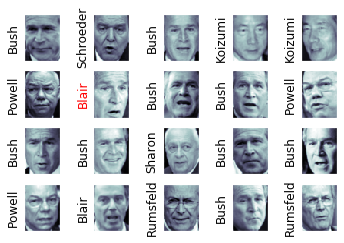

In [181]:
fig,axes = plt.subplots(4,5)
for i,ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(62,47),cmap='bone')
    ax.set(xticks=[],yticks=[])
    ax.set_ylabel(ylabel=faces.target_names[yfit[i]].split()[-1],
          color='black' if yfit[i]==Ytest[i] else 'red')
    



In [182]:
from sklearn.metrics import classification_report,confusion_matrix

In [183]:
print(classification_report(yfit, Ytest,target_names= faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.73      0.73        15
     Colin Powell       0.88      0.85      0.86        71
  Donald Rumsfeld       0.84      0.74      0.79        35
    George W Bush       0.83      0.93      0.88       113
Gerhard Schroeder       0.74      0.74      0.74        23
      Hugo Chavez       0.75      0.88      0.81        17
Junichiro Koizumi       0.92      0.85      0.88        13
       Tony Blair       0.93      0.78      0.85        50

         accuracy                           0.84       337
        macro avg       0.83      0.81      0.82       337
     weighted avg       0.85      0.84      0.84       337



In [184]:
mat = confusion_matrix(Ytest,yfit)

Text(73.64857142857144, 0.5, 'Predicted Label')

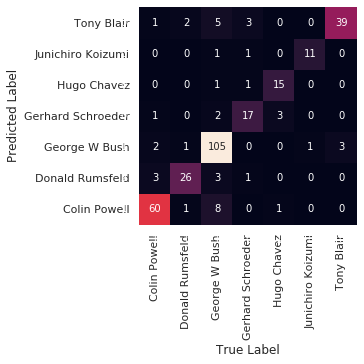

In [189]:
sns.heatmap(mat.T, annot=True, square=True,cbar=False,fmt='d',
           xticklabels=faces.target_names,
           yticklabels=faces.target_names)
plt.xlim(1,8)
plt.ylim(1,8)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")